9Kelompok 3 Data Mining
1. Ahda Faizalziddi Al Aziz     (STI202303600)
2. Ilham Aufa Nugroho           (STI202303346)
3. Fauzi Nur Falah              (STI202303409)
4. Muhammad Syarif Hidayatullah (STI202303527)
5. Tri Wahyu Hidayat            (STI202303353)
6. Muhammad Roy Setiawan        (STI202303331)
7. Sahrur Anam                  (STI202303552)
8. Muh Januar Imam Saputra      (STI202202623)

In [ ]:
# Instal library
!pip install pandas numpy scikit-learn seaborn matplotlib nltk wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Library machine learning & text processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import re

# Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/IMDB_Dataset.csv'
df = pd.read_csv('IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Hapus nilai kosong
df.dropna(inplace=True)

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)          # hapus HTML tag
    text = re.sub(r'[^a-zA-Z]', ' ', text)     # hapus angka & simbol
    text = text.lower()                        # ubah ke huruf kecil
    text = text.split()                        # tokenisasi sederhana
    text = [word for word in text if word not in stop_words]  # hapus stopwords
    return ' '.join(text)

df['clean_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [8]:
# Label encoding: positive = 1, negative = 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

print("=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


=== Naive Bayes ===
Akurasi: 0.8553
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [10]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

print("=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


=== Logistic Regression ===
Akurasi: 0.8915
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



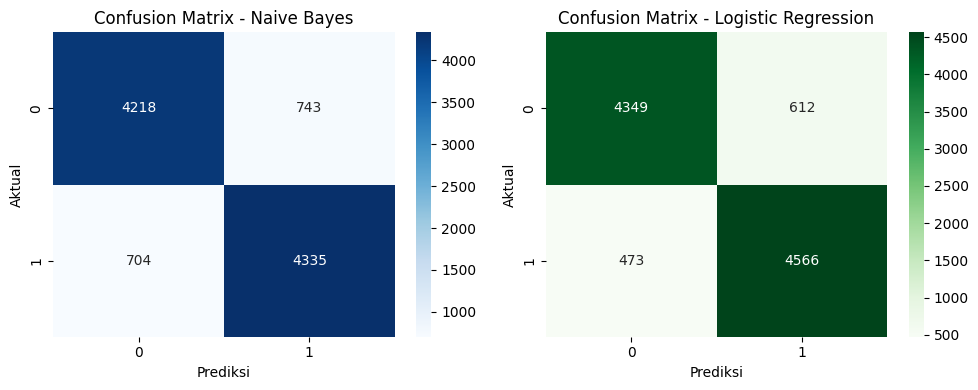

In [11]:
plt.figure(figsize=(10,4))

# NB
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Prediksi"); plt.ylabel("Aktual")

# LR
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Prediksi"); plt.ylabel("Aktual")

plt.tight_layout()
plt.show()


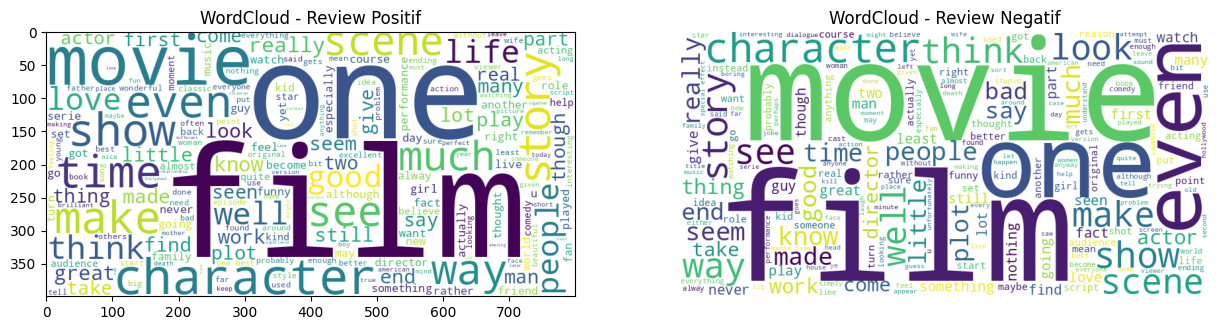

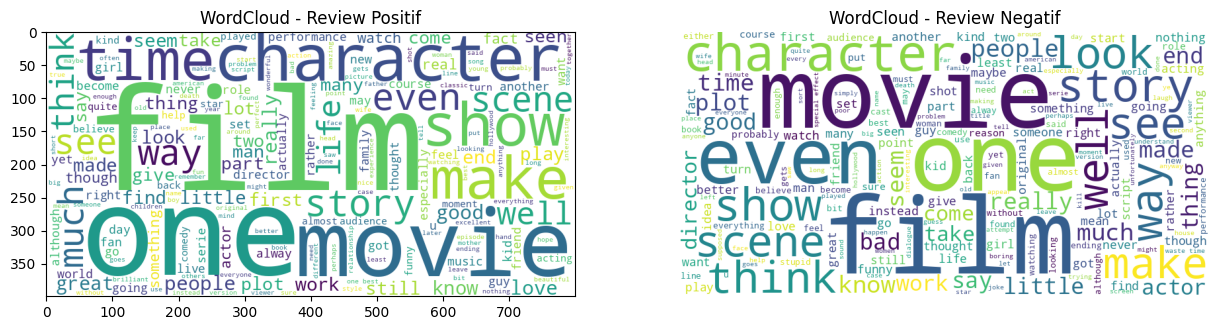

In [12]:
# Review positif
pos_text = " ".join(df[df.sentiment == 1]['clean_review'])
# Review negatif
neg_text = " ".join(df[df.sentiment == 0]['clean_review'])

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(pos_text))
plt.title("WordCloud - Review Positif")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(neg_text))
plt.title("WordCloud - Review Negatif")

plt.axis("off")
plt.show()
# Review positif
pos_text = " ".join(df[df.sentiment == 1]['clean_review'])
# Review negatif
neg_text = " ".join(df[df.sentiment == 0]['clean_review'])

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(pos_text))
plt.title("WordCloud - Review Positif")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(neg_text))
plt.title("WordCloud - Review Negatif")

plt.axis("off")
plt.show()
